<a href="https://colab.research.google.com/github/ersmythe/MAT421/blob/main/Module_E.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 3.2 Continuity and Differentiation
A function is continuous if at every point the limit as x approaches a of f(x) = f(a).

The definition of a derivative is f'(x0)=lim(h->0) (f(x0+j)-f(x0)/h)

If the endpoints of a continuous, differentiable function have an equal value (f(a)=f(b)), then there is a point at which the function is flat in between those end points (f'(c)=0 for some a<c<b).

Mean Value Theorem: If f is a continuous, differentiable function over the range from a to b, then there is a<c<b such that f(b) = f(a)+(b-a)f'(c). This says there is some point c on the interval at which the derivative is equal to the average slope between a and b.

In [3]:
#Limit
import sympy as sym
x = sym.symbols('x')
f = sym.sin(x)/x
limit = sym.limit(f, x, 0)
print(limit)



1


In [28]:
# Mean Value Theorem
import sympy as sym
import numpy as np
x = sym.symbols('x')
f = 3*x**2+2*x+1
f_prime = sym.diff(f)
slope = (f.subs(x,4)-f.subs(x,1))/(4-1)
c = (sym.solve(f_prime - slope, x))
print(f_prime)
print(slope)
print(c[0])

f_prime.subs(x, c[0]) == slope


6*x + 2
17
5/2


True

Taylor's Theorem

Taylor's theorem  is an extension of the mean value theorem.


Let f be a function that has a continuous derivative to the m degree over the interval from a to b. Then:

f(b) = f(a) + (b-a)f'(a) + 1/2(b-a)^2f''(a) +...+ ((b-a)^(m-1))/(m-1)!*f^(m-1)(a) + Rm

And Rm = (b-a)^m/m!*f^m(a+d(b-a)) for some 0<d<1

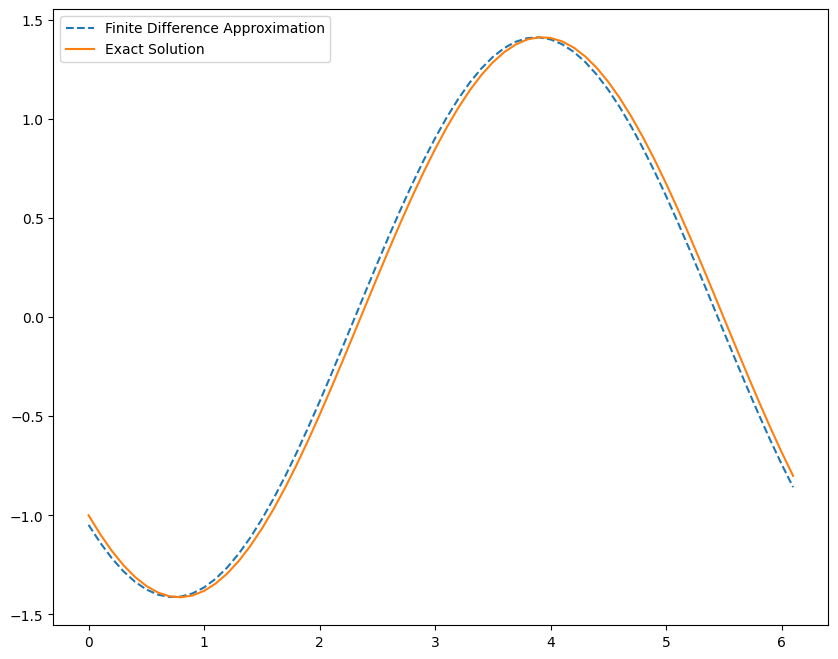

0.07067256453837634


In [29]:
import numpy as np
import matplotlib.pyplot as plt

h = 0.1
x = np.arange(0, 2*np.pi, h)
y = np.cos(x) - np.sin(x)

forward_diff = np.diff(y)/h
x_diff = x[:-1:]
exact_solution = -np.sin(x_diff) - np.cos(x_diff)

plt.figure(figsize = (10, 8))
plt.plot(x_diff, forward_diff, '--', label = 'Finite Difference Approximation')
plt.plot(x_diff, exact_solution, label = 'Exact Solution')
plt.legend()
plt.show()
max_error = max(abs(exact_solution - forward_diff))
print(max_error)

# 3.3 Unconstrained Optimization
A value of x* is said to be a global minimizer if $f(x)≤f(x^*)$ for all x. That is, the global minimizer is the independent variable value at which a continuous function has a global minimum.

A value of x* is said to be a *local minimizer* if $f(x)≤f(x*)$ and there exists a δ>0 such that $∀x∈B_δ(x^*)/[x^*]$. This means that x* is a local minimizer if $f(x^*)$ is smaller less than the points on either side of it.

A vector v is a descent direction for a given point if the function decreases when going that direction from that point. So if v is a descent direction for f at $x_0$, then $f(x_0+αv)<f(x_0)$.


[]

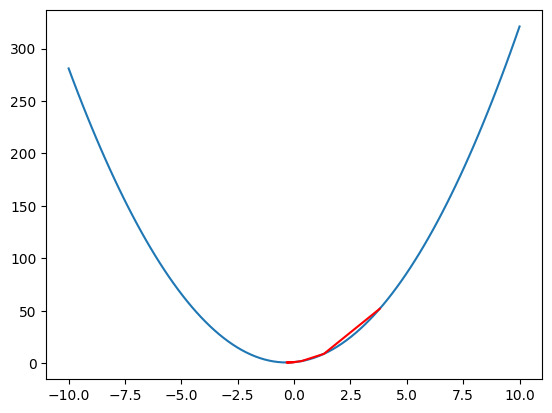

In [55]:
# Gradient Descent
import numpy as np
import matplotlib.pyplot as plt
import sympy as sym

def gradient_descent(gradient, x0, learn_rate, n, tol):
  vector = x0
  Vector = np.zeros((n, 1))
  for i in range(n):
    diff = -learn_rate * gradient(vector)
    if np.all(np.abs(diff) <= tol):
      break
    vector += diff
    Vector[i] = vector
  return [vector,Vector]


  # We'll use f = 3x^2 + 2x + 1, so the gradient is 6x + 2
x = sym.symbols('x')
f = 3*x**2+2*x+1
gradient = sym.Lambda(x, sym.diff(f))
[localmin, Vector] = gradient_descent(gradient, 10.0, 0.1, 100, 1e-06)

xvals = np.linspace(-10, 10, 100)
yvals = sym.lambdify(x, f, modules=['numpy'])(xvals)
plt.plot(xvals, yvals, label="Function")
plt.plot(Vector, sym.lambdify(x, f, modules=['numpy'])(Vector), 'r', label="Gradient Descent")

plt.plot()